## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

In this project, I am going to do an A/B test in order to investigate if a new webpage should be implemented or discarded for an e-commerce website. The main purpose of this project is to find out if the new webpage can bring greater, equal or less value to the website, so they can decide if they will use the new webpage, or keep the old version, or make the decision later after longer experiment time.

(**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).)

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

There are 294478 rows in the dataset.

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

There are 290584 unique users.

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

The proportion of users converted is 0.12.

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
mis_control=df.query('(group=="control")and(landing_page=="new_page")')
mis_treatment=df.query('(group=="treatment")and(landing_page=="old_page")')
len(mis_control),len(mis_treatment),len(mis_control)+len(mis_treatment)

(1928, 1965, 3893)

There are 1928 users in the control group but presented with new_page, and 1965 users in the treatment group but showed the old_page. In total, there are 3893 times the new_page and treatment don't line up.

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


The Non-Null count for each variable is 294478, so there are no missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Select the rows that treatment is lined up with page presented. 
df2=df.query('(group=="control" and landing_page=="old_page") or (group=="treatment" and landing_page=="new_page")')
df2.shape

(290585, 5)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

There are 290584 unique user ids. 

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated(subset=['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


The user_id of the duplicated user is 773192.

c. What is the row information for the repeat **user_id**? 

In [12]:
df2_duplicated=df2.query('user_id==773192')
df2_duplicated

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(['user_id'], inplace=True)
df2.shape

/var/folders/9k/lp2jptfd77b4yq9lyz18vrnc0000gn/T/ipykernel_75448/705933510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(['user_id'], inplace=True)


(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.converted.mean()

0.11959708724499628

the probability of user converting is 0.12.

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control_convert=df2.query('group=="control"').converted.mean()
control_convert

0.1203863045004612

The probability of converting in control group is 0.1204.

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treatment_convert=df2.query('group=="treatment"').converted.mean()
treatment_convert

0.11880806551510564

The probability of converting in treatment group is 0.1188.

d. What is the probability that an individual received the new page?

In [17]:
len(df2.query('landing_page=="new_page"'))/len(df2)

0.5000619442226688

The probability of receiving the new page is 0.50006

In [18]:
1-len(df2.query('landing_page=="new_page"'))/len(df2)

0.4999380557773312

The probability of receiving the old page is 0.49994

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

1. The probability of a user receiving the new page(0.50006) is almost identical with the probability of a user receiving the old page(0.49994). In this case, this experiment is quite balanced in terms of numbers in control group and treatment group.

2. The convertion rate in control group is 0.1204, which is slightly greater than the convertion rate in experiment group(0.1188). 

3. Based on the evidence that control group convertion rate is even bigger than treatment group convertion rate, we can not conclude that the new treatment page leads to more conversions.

4. On the other hand, we cannot say the old page leads to higher conversion rate either, because we don't know if it is statistically significant. The data has to be further investigated to confirm our guess. 



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<center>$H_{0}$:$p_{new}$−$p_{old}$≤0</center>
 
<center>$H_{1}$:$p_{new}$−$p_{old}$>0</center>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
p_new=df2.converted.mean()
p_new

0.11959708724499628

The convert rate for $p_{new}$ under the null is 0.1196.

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old=df2.converted.mean()
p_old

0.11959708724499628

The convert rate for $p_{old}$ under the null is 0.1196.

c. What is $n_{new}$?

In [21]:
df2_new=df2.query('landing_page=="new_page"')
n_new=len(df2_new)
n_new

145310

$n_{new}$ is 145310.

d. What is $n_{old}$?

In [22]:
df2_old=df2.query('landing_page=="old_page"')
n_old=len(df2_old)
n_old

145274

$n_{old}$ is 145274.

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted=np.random.binomial(n=1,p=p_new,size=n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted=np.random.binomial(n=1,p=p_old,size=n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted.mean() - old_page_converted.mean()

-0.0005112094819943458

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs = []
for _ in range(10000):
    new_page_converted=np.random.binomial(n=1,p=p_new,size=n_new)
    old_page_converted=np.random.binomial(n=1,p=p_old,size=n_old)
    diffs=new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

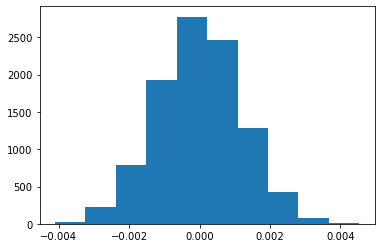

In [27]:
p_diffs=np.array(p_diffs)
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
#calculate the difference using our dataset
control_converted=df2.query('group == "control"').converted.mean()
treatment_converted=df2.query('group == "treatment"').converted.mean()
obs_diff=treatment_converted-control_converted
obs_diff

-0.0015782389853555567

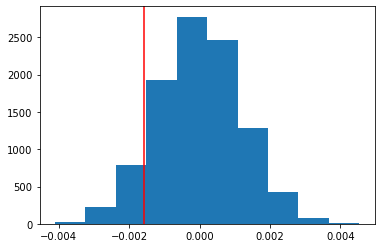

In [29]:
#plot obs_diff along with the distrubition under null hypothesis

plt.hist(p_diffs)
plt.axvline(obs_diff,color='red');

In [30]:
#calculate proportion of the p_diffs are greater 
#than the actual difference observed in ab_data.csv

(p_diffs > obs_diff).mean()

0.9046

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value we calculated is p value. 0.9001 is a large p value meaning there is more than 90% chance we can observe the difference of conversion rate (or one more extreme in favor of the alternative). Given Type I error rate 5%, we cannot reject the null hypothesis. In conclusion, we don't have enough evidence to say new page can bring statistically higher conversion rate to the website.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.query('(converted == 1) and (group == "control")').count()
convert_new = df2.query('(converted == 1) and (group == "treatment")').count()
n_old = df2.query('group == "control"').count()
n_new = df2.query('group == "treatment"').count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
counts = [convert_new.iloc[0], convert_old.iloc[0]]
nobs = [n_new.iloc[0], n_old.iloc[0]]
z_score, p_value = sm.stats.proportions_ztest(counts, nobs, alternative='larger')
p_value,z_score

(0.9050583127590245, -1.3109241984234394)

In [33]:
#Find critical z-score

from scipy.stats import norm
p = 0.95
critical_z_score = norm.ppf(p)
critical_z_score

1.6448536269514722

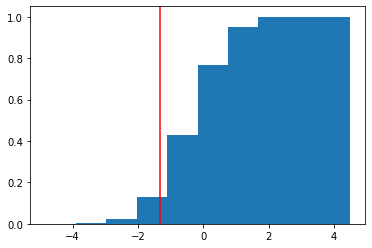

In [34]:
# plot sample z-score along with the normal distrubition under null hypothesis

plt.hist(np.random.normal(0, 1, 10000), density=True, cumulative=True)
plt.axvline(x=z_score, color='red');

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**1. A z-test is a statistical test used to determine whether two population means are different when the variances are known and the sample size is large. The critical z-score values when using a 95 percent confidence level are -1.96 and +1.96 standard deviations. The absolute value of z-score in our dataset is 1.31, which is smaller than the critical Z score, suggesting that we fail to reject the null hypothesis.**

**2. Similarly, p-value computed above is very close to what we got in part j. 0.905 is a very large p-value, meaning we cannot reject the null hypothesis.**

**3. Based on both z-score and p-value, it is obvious that the null hypothesis is not rejected. The results in part j and k are consistent. We don't have enough evidence to say the new page has higher conversion rate than the old page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
#create intercept and dummy variable column
df2['intercept'] = 1
df2[['treatment','control']] = pd.get_dummies(df2['group'])
df2=df2.drop('treatment',axis = 1)


/var/folders/9k/lp2jptfd77b4yq9lyz18vrnc0000gn/T/ipykernel_75448/2975226124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1
/var/folders/9k/lp2jptfd77b4yq9lyz18vrnc0000gn/T/ipykernel_75448/2975226124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['treatment','control']] = pd.get_dummies(df2['group'])
/var/folders/9k/lp2jptfd77b4yq9lyz18vrnc0000gn/T/ipykernel_75448/2975226124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [36]:
# rename dummy varaible as ab_page
df2.rename(columns = {'control':'ab_page'},inplace = True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
log_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 01 Nov 2022   Pseudo R-squ.:               8.077e-06
Time:                        23:59:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**P-value associated with ab_page is 0.19. It is different from the value in Part II because the null and alternative hypotheses are not the same. In the regression model, the null hypothesis is that ab_page has no correlation with conversion rate. Meanwhile, the alternative hypothesis is that ab_page does have correlation with conversion rate.**

**On the other hand, the null hypothesis in Part II is that new page leads to smaller or equal conversion rate. And the alternative hypothesis is that new page leads to higher conversion rate.**

**To summarize, in Part III the alternative is 'not equal' which is a two sided test, while in Part II the A/B test is a one tailed test. Here p-value for ab_page(0.19) is greater than the threshhold of type I error(0.05), therefore, ab_page is not related to conversion rate significantly.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**In reality, whether an individual converts or not depends on a great deal of factors. For instance, what kind of device they are using, how familiar they are with the website, how long did they spend on the webpage. Even demographic features of each individual such as gender or age can influence their behavior.**

**Consider other factors to add into regression model can help us avoid problems like Simpson's paradox. It may also shed lights on the key indicators of conversion rate, providing better strategies for future reference. However, adding more factors will also lead to complexity of interpreting the results and issues like multi-collinearity.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [42]:
### Create the necessary dummy variables

df_new[['US','UK',"CA"]] = pd.get_dummies(df_new['country'])
df_new = df_new.drop('US',axis = 1)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,CA
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1
logit_mod = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','CA']])
result = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Nov 2022   Pseudo R-squ.:               8.077e-06
Time:                        00:00:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.